In [37]:
import numpy as np
import pandas as pd
import os
import itertools

In [4]:
from google.colab import files
uploaded = files.upload()

Saving fashion_train.csv to fashion_train.csv


In [38]:
data = pd.read_csv("/content/fashion_train.csv")

In [39]:
data.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,fname
0,40435,Women,Apparel,Topwear,Tops,White,Summer,Casual,40435.jpg
1,18612,Men,Apparel,Topwear,Tshirts,Black,Fall,Sports,18612.jpg
2,21998,Women,Accessories,Bags,Handbags,Blue,Winter,Casual,21998.jpg
3,25235,Women,Accessories,Bags,Backpacks,Blue,Winter,Casual,25235.jpg
4,8078,Men,Footwear,Sandal,Sandals,Blue,Fall,Casual,8078.jpg
5,45029,Men,Accessories,Watches,Watches,Black,Winter,Casual,45029.jpg
6,52323,Women,Accessories,Jewellery,Bangle,White,Winter,Casual,52323.jpg
7,18991,Men,Apparel,Topwear,Tshirts,Black,Summer,Casual,18991.jpg
8,7066,Unisex,Accessories,Bags,Backpacks,Black,Summer,Sports,7066.jpg
9,56161,Women,Personal Care,Eyes,Kajal and Eyeliner,Brown,Spring,Casual,56161.jpg


masterCateogry and subCategory will always co-occur. so there is no point in having both columns.

In [40]:
data = data.drop(columns=["id","fname","masterCategory"])
data.head()

,gender,subCategory,articleType,baseColour,season,usage
0,Women,Topwear,Tops,White,Summer,Casual
1,Men,Topwear,Tshirts,Black,Fall,Sports
2,Women,Bags,Handbags,Blue,Winter,Casual
3,Women,Bags,Backpacks,Blue,Winter,Casual
4,Men,Sandal,Sandals,Blue,Fall,Casual


In [41]:
rowlength = len(data)
no_features = len(data.values[0])

In [42]:
print(rowlength, no_features)

1983 6


In [43]:
minimum_support_count = 2

records = []
for i in range(0, rowlength):
    records.append([str(data.values[i,j]) for j in range(0, no_features)])
items = sorted([item for sublist in records for item in sublist if item != 'Nan'])

In [44]:
def stage_1(items, minimum_support_count):
    c1 = {i:items.count(i) for i in items}
    l1= {}
    
    for key, value in c1.items():
        if(value >= minimum_support_count):
            l1[key] = value
    return c1, l1
c1, l1 = stage_1(items, minimum_support_count)

In [45]:
c1

{'Accessories': 8,
 'Accessory Gift Set': 5,
 'Apparel Set': 5,
 'Baby Dolls': 1,
 'Backpacks': 34,
 'Bags': 139,
 'Bangle': 5,
 'Bath Robe': 1,
 'Beige': 33,
 'Belts': 48,
 'Black': 434,
 'Blue': 224,
 'Bottomwear': 96,
 'Boxers': 3,
 'Boys': 32,
 'Bra': 25,
 'Bracelet': 1,
 'Briefs': 45,
 'Bronze': 2,
 'Brown': 138,
 'Burgundy': 2,
 'Camisoles': 2,
 'Capris': 5,
 'Caps': 9,
 'Casual': 1561,
 'Casual Shoes': 133,
 'Charcoal': 7,
 'Churidar': 1,
 'Clutches': 16,
 'Coffee Brown': 1,
 'Compact': 1,
 'Copper': 3,
 'Cream': 15,
 'Cufflinks': 4,
 'Deodorant': 12,
 'Dress': 16,
 'Dresses': 16,
 'Duffel Bag': 5,
 'Dupatta': 2,
 'Earrings': 15,
 'Ethnic': 151,
 'Eyes': 2,
 'Eyewear': 49,
 'Face Moisturisers': 3,
 'Face Wash and Cleanser': 1,
 'Fall': 531,
 'Flats': 25,
 'Flip Flops': 72,
 'Footballs': 1,
 'Formal': 96,
 'Formal Shoes': 36,
 'Foundation and Primer': 2,
 'Fragrance': 40,
 'Fragrance Gift Set': 3,
 'Free Gifts': 15,
 'Girls': 23,
 'Gloves': 2,
 'Gold': 27,
 'Green': 113,
 'Grey':

In [46]:
l1

{'Accessories': 8,
 'Accessory Gift Set': 5,
 'Apparel Set': 5,
 'Backpacks': 34,
 'Bags': 139,
 'Bangle': 5,
 'Beige': 33,
 'Belts': 48,
 'Black': 434,
 'Blue': 224,
 'Bottomwear': 96,
 'Boxers': 3,
 'Boys': 32,
 'Bra': 25,
 'Briefs': 45,
 'Bronze': 2,
 'Brown': 138,
 'Burgundy': 2,
 'Camisoles': 2,
 'Capris': 5,
 'Caps': 9,
 'Casual': 1561,
 'Casual Shoes': 133,
 'Charcoal': 7,
 'Clutches': 16,
 'Copper': 3,
 'Cream': 15,
 'Cufflinks': 4,
 'Deodorant': 12,
 'Dress': 16,
 'Dresses': 16,
 'Duffel Bag': 5,
 'Dupatta': 2,
 'Earrings': 15,
 'Ethnic': 151,
 'Eyes': 2,
 'Eyewear': 49,
 'Face Moisturisers': 3,
 'Fall': 531,
 'Flats': 25,
 'Flip Flops': 72,
 'Formal': 96,
 'Formal Shoes': 36,
 'Foundation and Primer': 2,
 'Fragrance': 40,
 'Fragrance Gift Set': 3,
 'Free Gifts': 15,
 'Girls': 23,
 'Gloves': 2,
 'Gold': 27,
 'Green': 113,
 'Grey': 115,
 'Grey Melange': 7,
 'Handbags': 75,
 'Headwear': 10,
 'Heels': 58,
 'Highlighter and Blush': 4,
 'Innerwear': 86,
 'Innerwear Vests': 8,
 'Jac

In [47]:
def sublist(lst1,lst2):
    return(set(lst1) <= set(lst2))

In [48]:
def check_subset_frequency(itemset, l, n):
    if(n>1):
        subsets = list(itertools.combinations(itemset,n))
    else:
        subsets = itemset
    for iter1 in subsets:
        if not iter1 in l:
            return False
    return True

In [49]:
def stage_2(l1, records, minimum_support_count):
    l1 = sorted(list(l1.keys()))
    l1 = list(itertools.combinations(l1,2))
    c2 = {}
    l2 = {}
    for iter1 in l1:
        count = 0
        for iter2 in records:
            if(sublist(iter1,iter2)):
                count += 1
        c2[iter1] = count
    for key,value in c2.items():
        if(value >= minimum_support_count):
            if(check_subset_frequency(key, l1,2)):
                l2[key] = value
    return c2, l2

c2,l2 = stage_2(l1, records, minimum_support_count)

In [70]:
c2

{('Accessories', 'Accessory Gift Set'): 5,
 ('Accessories', 'Apparel Set'): 0,
 ('Accessories', 'Backpacks'): 0,
 ('Accessories', 'Bags'): 0,
 ('Accessories', 'Bangle'): 0,
 ('Accessories', 'Beige'): 0,
 ('Accessories', 'Belts'): 0,
 ('Accessories', 'Black'): 3,
 ('Accessories', 'Blue'): 0,
 ('Accessories', 'Bottomwear'): 0,
 ('Accessories', 'Boxers'): 0,
 ('Accessories', 'Boys'): 0,
 ('Accessories', 'Bra'): 0,
 ('Accessories', 'Briefs'): 0,
 ('Accessories', 'Bronze'): 0,
 ('Accessories', 'Brown'): 3,
 ('Accessories', 'Burgundy'): 0,
 ('Accessories', 'Camisoles'): 0,
 ('Accessories', 'Capris'): 0,
 ('Accessories', 'Caps'): 0,
 ('Accessories', 'Casual'): 6,
 ('Accessories', 'Casual Shoes'): 0,
 ('Accessories', 'Charcoal'): 0,
 ('Accessories', 'Clutches'): 0,
 ('Accessories', 'Copper'): 0,
 ('Accessories', 'Cream'): 0,
 ('Accessories', 'Cufflinks'): 0,
 ('Accessories', 'Deodorant'): 0,
 ('Accessories', 'Dress'): 0,
 ('Accessories', 'Dresses'): 0,
 ('Accessories', 'Duffel Bag'): 0,
 ('Acc

In [71]:
l2

{('Accessories', 'Accessory Gift Set'): 5,
 ('Accessories', 'Black'): 3,
 ('Accessories', 'Brown'): 3,
 ('Accessories', 'Casual'): 6,
 ('Accessories', 'Fall'): 4,
 ('Accessories', 'Formal'): 2,
 ('Accessories', 'Men'): 5,
 ('Accessories', 'Messenger Bag'): 2,
 ('Accessories', 'Summer'): 4,
 ('Accessories', 'Unisex'): 3,
 ('Accessory Gift Set', 'Brown'): 3,
 ('Accessory Gift Set', 'Casual'): 3,
 ('Accessory Gift Set', 'Fall'): 2,
 ('Accessory Gift Set', 'Formal'): 2,
 ('Accessory Gift Set', 'Men'): 5,
 ('Accessory Gift Set', 'Summer'): 3,
 ('Apparel Set', 'Black'): 2,
 ('Apparel Set', 'Ethnic'): 4,
 ('Apparel Set', 'Fall'): 4,
 ('Apparel Set', 'Kurta Sets'): 4,
 ('Apparel Set', 'Women'): 4,
 ('Backpacks', 'Bags'): 33,
 ('Backpacks', 'Black'): 13,
 ('Backpacks', 'Blue'): 6,
 ('Backpacks', 'Casual'): 31,
 ('Backpacks', 'Fall'): 7,
 ('Backpacks', 'Grey'): 4,
 ('Backpacks', 'Men'): 2,
 ('Backpacks', 'Navy Blue'): 3,
 ('Backpacks', 'Pink'): 3,
 ('Backpacks', 'Red'): 2,
 ('Backpacks', 'Sports

In [110]:
import operator
newA = dict(sorted(l2.items(), key=operator.itemgetter(1), reverse=True)[:20])
newA

{('Black', 'Casual'): 337,
 ('Black', 'Men'): 255,
 ('Casual', 'Fall'): 354,
 ('Casual', 'Men'): 745,
 ('Casual', 'Shoes'): 214,
 ('Casual', 'Summer'): 709,
 ('Casual', 'Topwear'): 524,
 ('Casual', 'Tshirts'): 285,
 ('Casual', 'Winter'): 379,
 ('Casual', 'Women'): 661,
 ('Fall', 'Men'): 310,
 ('Fall', 'Topwear'): 309,
 ('Men', 'Summer'): 477,
 ('Men', 'Topwear'): 413,
 ('Men', 'Tshirts'): 241,
 ('Summer', 'Topwear'): 393,
 ('Summer', 'Women'): 364,
 ('Topwear', 'Tshirts'): 326,
 ('Topwear', 'Women'): 260,
 ('Winter', 'Women'): 215}

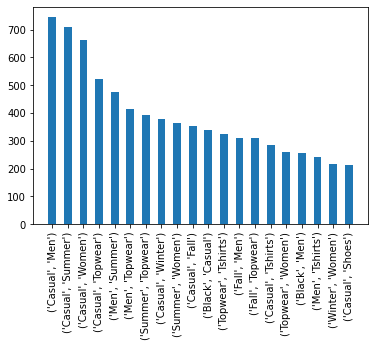

In [111]:
import matplotlib.pyplot as plt
plt.bar(range(len(newA)), newA.values(), align='center', width=0.5)
plt.xticks(range(len(newA)), list(newA.keys()), rotation='vertical')

plt.show()